In [17]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MRS02 -- vytvorenie grafov do textu

In [18]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import odeint



import sys
sys.path.append('./celljobs/')
sys.path.append('./figjobs/')

from figFcns_TeX import *


### Ku kyvadlu:

In [19]:
m = 1
l = 1
g = 9.81
beta = 2 * 0.5 * np.sqrt(g/l)

In [20]:
def fcn_rovniceKyvadla(x, t, u):

    x_1, x_2 = x

    dotx_1 = x_2
    # dotx_2 = -(beta/m*l**2) * x_2 - (g/l) * np.sin(x_1) + (1.0/m*l**2) *u
    dotx_2 = -(beta/(m*(l**2))) * x_2 - ((m*g*l)/(m*(l**2))) * np.sin(x_1) + (1.0/(m*(l**2))) *u

    return [dotx_1, dotx_2]

cv02_fig_1
cv02_fig_2


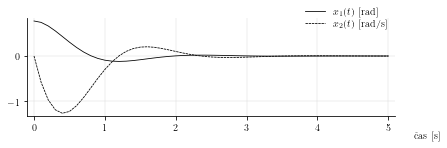

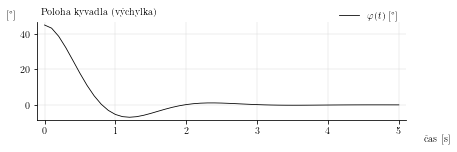

In [21]:
u = 0

timeVect = np.arange(0, 5.1, 0.1)

x = odeint(fcn_rovniceKyvadla,
           [np.pi/4, 0],   # začiatočné podmienky
           timeVect,
           args=(u,),
           )

figNameNum = 1
exec(open('figjobs/figsc_04.py', encoding='utf-8').read())     

figNameNum = 2
exec(open('figjobs/figsc_05.py', encoding='utf-8').read())     

cv02_fig_3


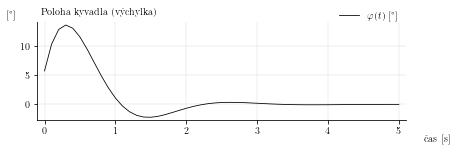

In [22]:
x = odeint(fcn_rovniceKyvadla,
           [0.1, 1],   # začiatočné podmienky
           timeVect,
           args=(u,),
           )


figNameNum = 3
exec(open('figjobs/figsc_05.py', encoding='utf-8').read())

cv02_fig_4


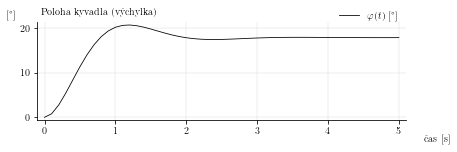

In [23]:
u = 3

x = odeint(fcn_rovniceKyvadla,
           [0, 0],   # začiatočné podmienky
           timeVect,
           args=(u,),
           )


figNameNum = 4
exec(open('figjobs/figsc_05.py', encoding='utf-8').read())

cv02_fig_5


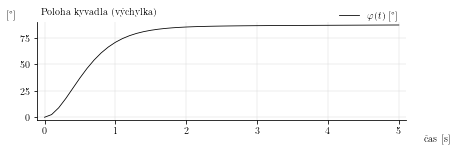

In [24]:
u = 9.81

x = odeint(fcn_rovniceKyvadla,
           [0, 0],   # začiatočné podmienky
           timeVect,
           args=(u,),
           )


figNameNum = 5
exec(open('figjobs/figsc_05.py', encoding='utf-8').read())


cv02_fig_6


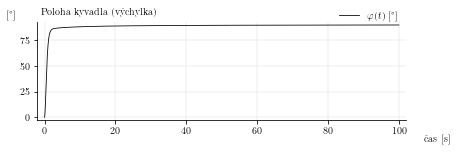

In [25]:
timeVect = np.arange(0, 100, 0.1)

u = 9.81

x = odeint(fcn_rovniceKyvadla,
           [0, 0],   # začiatočné podmienky
           timeVect,
           args=(u,),
           )


figNameNum = 6
exec(open('figjobs/figsc_05.py', encoding='utf-8').read())

cv02_fig_7


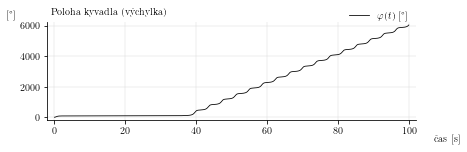

In [26]:
timeVect = np.arange(0, 100, 0.1)

u = 9.82

x = odeint(fcn_rovniceKyvadla,
           [0, 0],   # začiatočné podmienky
           timeVect,
           args=(u,),
           )


figNameNum = 7
exec(open('figjobs/figsc_05.py', encoding='utf-8').read())

### K jednosmernému motoru:

In [27]:
R = 0.737 #ohm
L = 0.00905 #H

Jm = 0.5 #kgm^2

CuM = 3.787 #Nm/A
Cuomega = 3.903 #V*s

In [28]:
def fcn_rovniceMotora(x, t, u):

    i, omega = x

    doti = (-R/L) * i - (Cuomega/L)*omega + (1/L)*u
    dotomega = (CuM/Jm) * i


    return [doti, dotomega]

In [29]:


def fcn_simSch01(t_start, T_s, finalIndex, u_tabulka):

    #-----------------------------------------
    # casovy vektor

    t_log = np.zeros([finalIndex, 1])
    t_log[0,:] = t_start

    #-----------------------------------------
    # vektor stavu riadeneho systemu

    x_0 = np.array([0, 0])

    x_log = np.zeros([finalIndex, len(x_0)])
    x_log[0,:] = x_0

    #-----------------------------------------
    # vektor akcneho zasahu

    u_log = np.zeros([finalIndex, 1])

    for idx in range(u_log.shape[0]):
        lastValue = u_tabulka[:,1][u_tabulka[:,0] <= idx*T_s ][-1]
        u_log[idx] = lastValue

    #-----------------------------------------

    timespan = np.zeros(2)
    for idx in range(1, int(finalIndex)):

        #-------------------------------------
        # Riadeny system - simulacia (pomocou ODEsolvera)

        timespan[0] = t_log[idx-1,:]
        timespan[1] = t_log[idx-1,:] + T_s

        odeOut = odeint(fcn_rovniceMotora,
                        x_log[idx-1,:],
                        timespan,
                        args=(u_log[idx-1,:],)
                        )

        x_log[idx,:] = odeOut[-1,:]
        t_log[idx,:] = timespan[-1]


    return [t_log, x_log, u_log]

In [30]:
u_tabulka = np.array([
                [0, 520],
                ])

In [31]:
# Nastavenia simulacie

sim_t_start = 0
sim_t_final = 0.3
sim_T_s = 0.001
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)


# Simulacia
t_log, x_log, u_log = fcn_simSch01(sim_t_start, sim_T_s, sim_finalIndex, u_tabulka)


kMRS02_fig_1


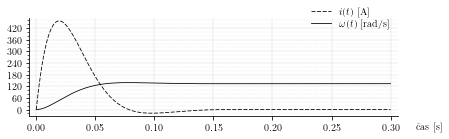

In [32]:
figNameNum = 1
exec(open('figjobs/MRS02_figsc_01.py', encoding='utf-8').read())